In [1]:
import numpy as np
from matplotlib import pyplot as plt
from data_loader import data_loader
from utils import params
from pydmd import DMD
from pydmd.plotter import plot_eigs

In [3]:
x_train, dx_train, x_val, dx_val = data_loader(params)

In [4]:
dmd = DMD(svd_rank=20)
dmd.fit(x_val.T)

/opt/anaconda3/envs/torch-nightly/lib/python3.8/site-packages/pydmd/plotter.py:189: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x7f8149553070>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(


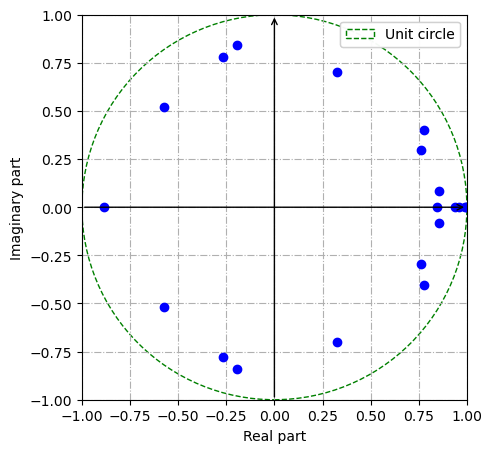

In [5]:
plot_eigs(dmd, figsize=(12, 5))

In [6]:
dmd.modes.real

array([[ 0.31550712, -0.42633881, -0.42633881, ...,  0.28878067,
         0.13376795, -0.16054206],
       [-0.27023556,  0.28375514,  0.28375514, ...,  0.28593201,
         0.12585688, -0.14682877],
       [ 0.25109531, -0.08541403, -0.08541403, ...,  0.28504426,
         0.11967078, -0.13683406],
       ...,
       [ 0.06572784,  0.06854813,  0.06854813, ...,  0.09631998,
         0.10489204, -0.1109656 ],
       [-0.05030776, -0.05259191, -0.05259191, ...,  0.09085059,
         0.10168694, -0.10390958],
       [ 0.01945588,  0.04484671,  0.04484671, ...,  0.08875334,
         0.09665263, -0.09791758]])

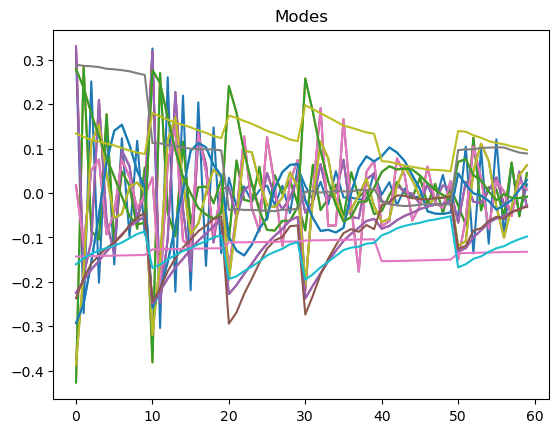

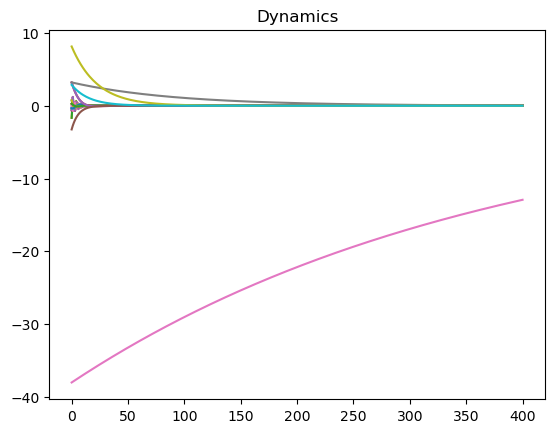

In [7]:
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title("Modes")
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(dynamic.real)
    plt.title("Dynamics")
plt.show()

In [8]:
x_pred = dmd.predict(x_val.T).real.T

In [9]:
measured_index = [i*params['embedding_dimension'] for i in range(params['partial_measurement'])]
x_pred = x_pred[:, measured_index]

In [10]:
x_pred

array([[6.55779774, 5.66229093, 4.55514232, 4.59181002, 5.65287447,
        5.69360958],
       [6.52048794, 5.42491332, 4.59711766, 4.65614564, 5.72260745,
        5.78325234],
       [6.97349317, 5.9119122 , 4.55820741, 4.5882594 , 5.76556265,
        5.822084  ],
       ...,
       [2.49945698, 2.19856576, 2.24588619, 2.03036249, 3.36794935,
        2.86169151],
       [2.87390013, 2.54591391, 2.31296906, 2.02163901, 3.17817745,
        2.69997798],
       [2.64097369, 2.33437531, 2.34264576, 2.04889251, 3.15733069,
        2.7430552 ]])

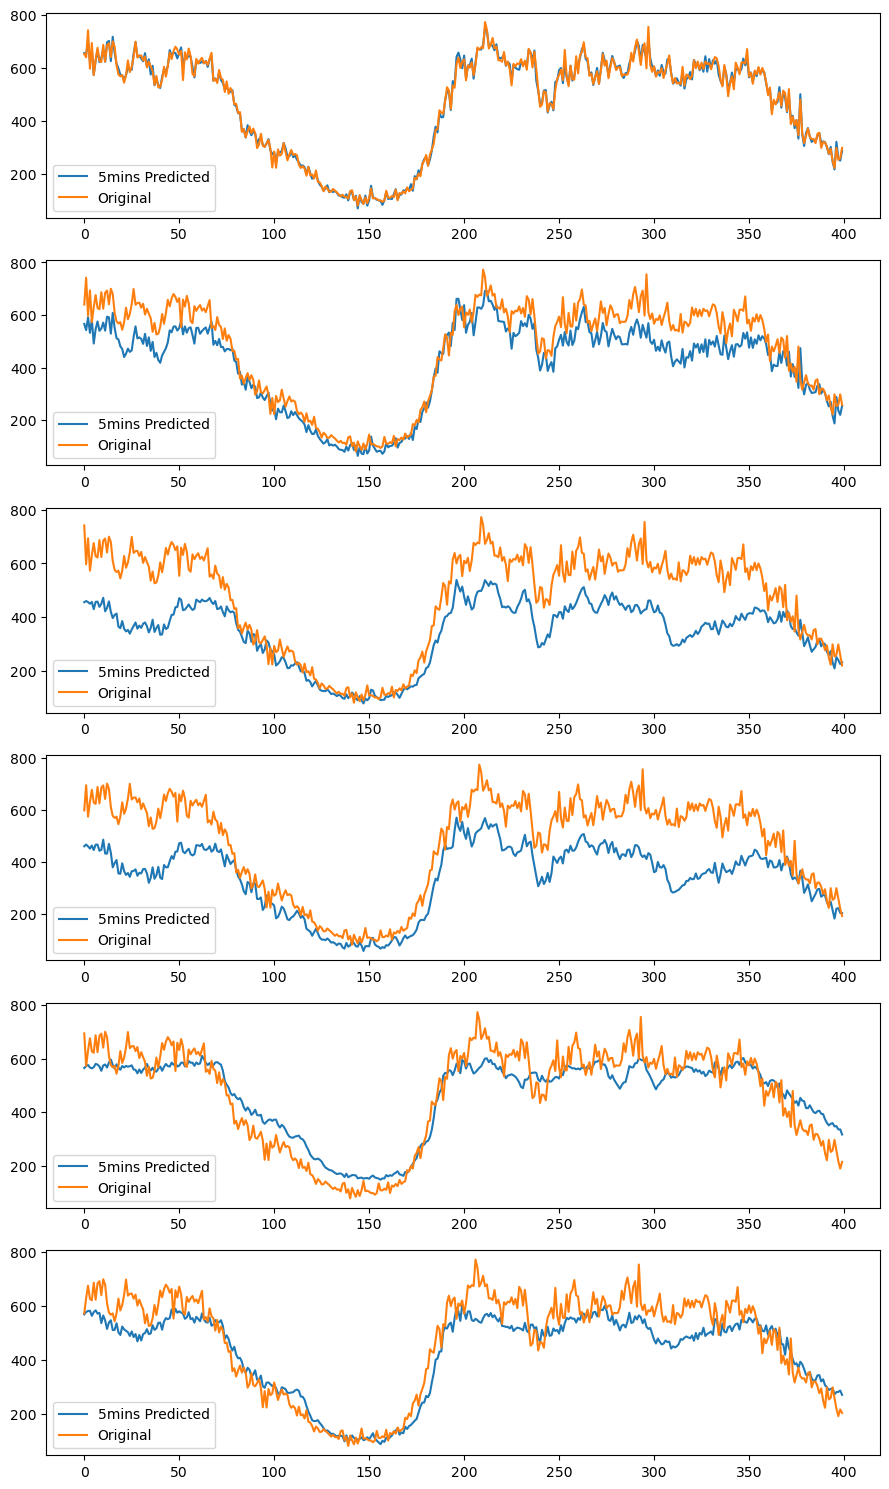

In [11]:
fig, axs = plt.subplots(nrows=params['partial_measurement'], ncols=1, figsize=(9, 15))
for i in range(params['partial_measurement']):
    axs[i].plot(100*x_pred[:-1, i], label = '5mins Predicted')
    axs[i].plot(100*x_val[1:,i], label = 'Original')
    axs[i].legend()
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error as mse

In [18]:
rmse_i = {}
for i in range(params['partial_measurement']):
    rmse_curr = np.sqrt(mse(100*x_pred[:-1, i], 100*x_val[1:,i]))
    rmse_i[f'Station #{i+1}'] = rmse_curr


In [28]:
import pandas as pd
accuracy = pd.DataFrame(rmse_i, index=[1]).round(2)
accuracy.to_csv("Accuracy_Metric/dmd.csv")